In [65]:
import numpy as np
import pandas as pd
import os

data_dir = 'data\physionet_dbs\cudb\clean_segments_250hz'
write_data_dir = 'data\physionet_dbs\cudb\clean_segments_ft_250hz'

if not os.path.exists(write_data_dir):
    os.makedirs(write_data_dir)

In [70]:
MAX_BPM = 250
ZERO_PADDING_MULTIPLE = 4

for segment_length_seconds in [3,4,5,6,7,8,9,10]:
    print(segment_length_seconds)

    dataset = pd.read_csv(f'{data_dir}//segments_{segment_length_seconds}.csv')
    dataset['segment_samples'] = dataset['segment_samples'].apply(lambda seg_list: eval(seg_list))

    # fft calculation
    dataset['segment_fft'] = dataset['segment_samples'].apply(
        lambda seg_list:
        list(
            np.round((np.abs(np.fft.fft(seg_list, n = len(seg_list) * ZERO_PADDING_MULTIPLE)) / len(seg_list))\
                [0:int(np.ceil(segment_length_seconds * MAX_BPM / 60)) * ZERO_PADDING_MULTIPLE], decimals = 4)
        )
    )

    dataset.drop(labels = ['segment_samples', 'start', 'file'], axis = 1, inplace = True)
    dataset.to_csv(f'{write_data_dir}\\ft_segments_{segment_length_seconds}s.csv', index = False)

3
4
5
6
7
8
9
10


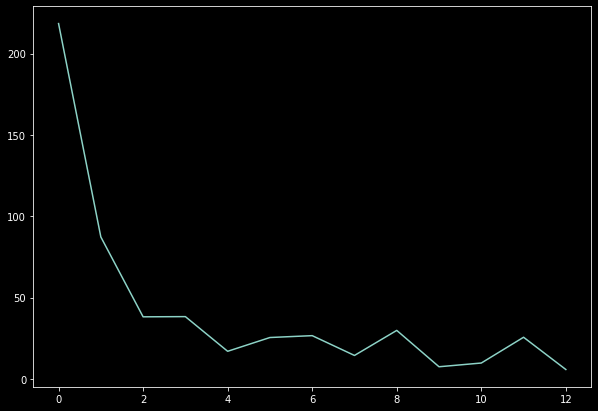

In [62]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(
        np.arange(dataset['segment_fft'].iloc[0].shape[0]),
        dataset['segment_fft'].iloc[0]
)

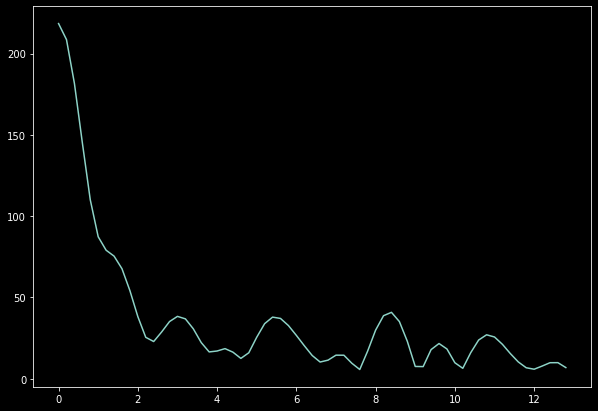

In [64]:
plt.plot(
        np.arange(dataset['segment_fft'].iloc[0].shape[0])/ZERO_PADDING_MULTIPLE,
        dataset['segment_fft'].iloc[0]
)